In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

patient_info = pd.read_csv('PatientInfo.csv')
patient_route = pd.read_csv('PatientRoute.csv')
time = pd.read_csv('Time.csv')
search_trend = pd.read_csv('SearchTrend.csv')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. PatientInfo.csv

In [2]:
patient_info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [3]:
patient_info.isnull().sum()

patient_id               0
global_num             904
sex                    145
birth_year             454
age                    261
country                  0
province                 0
city                    65
disease               2199
infection_case        1055
infection_order       2176
infected_by           1749
contact_number        1807
symptom_onset_date    2025
confirmed_date         141
released_date         1995
deceased_date         2186
state                   88
dtype: int64

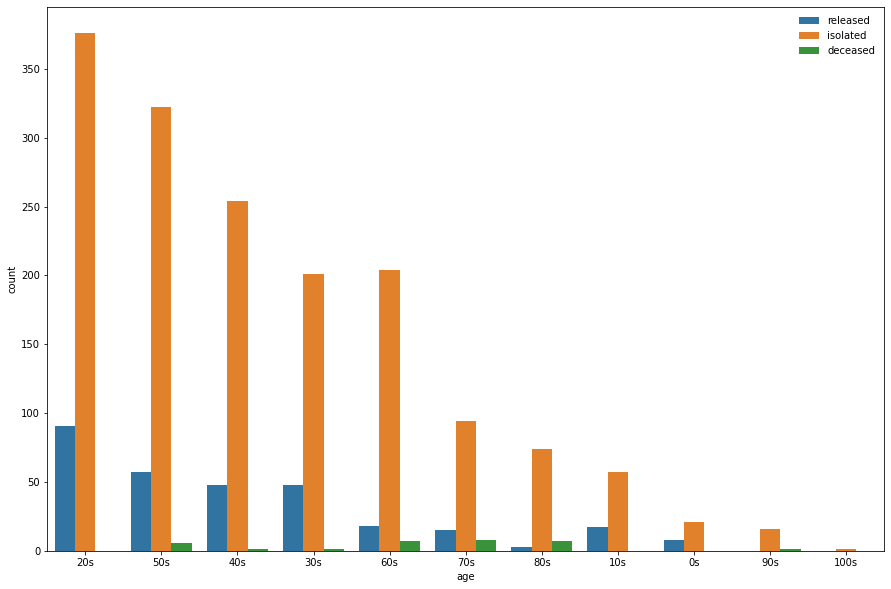

In [4]:
# PatientInfo.csv 활용
# 연령별 확진자, 사망자, 격리해제자 시각화
plt.figure(figsize = [15,10])
sns.countplot(x = 'age', hue = 'state', data = patient_info, order=patient_info['age'].value_counts().index)
plt.legend(loc='upper right', frameon=False)

연령별 격리해제자(Blue), 확진자(Orange), 사망자(Green) 순이다.

가장 활동이 많은 20대가 확진자 수가 많고, 그 다음으로 중장년층이 많이 감염된 것을 확인할 수 있다.

개학을 하지 않은 10대 이하의 어린이들의 확진자가 적음을 알 수 있다.

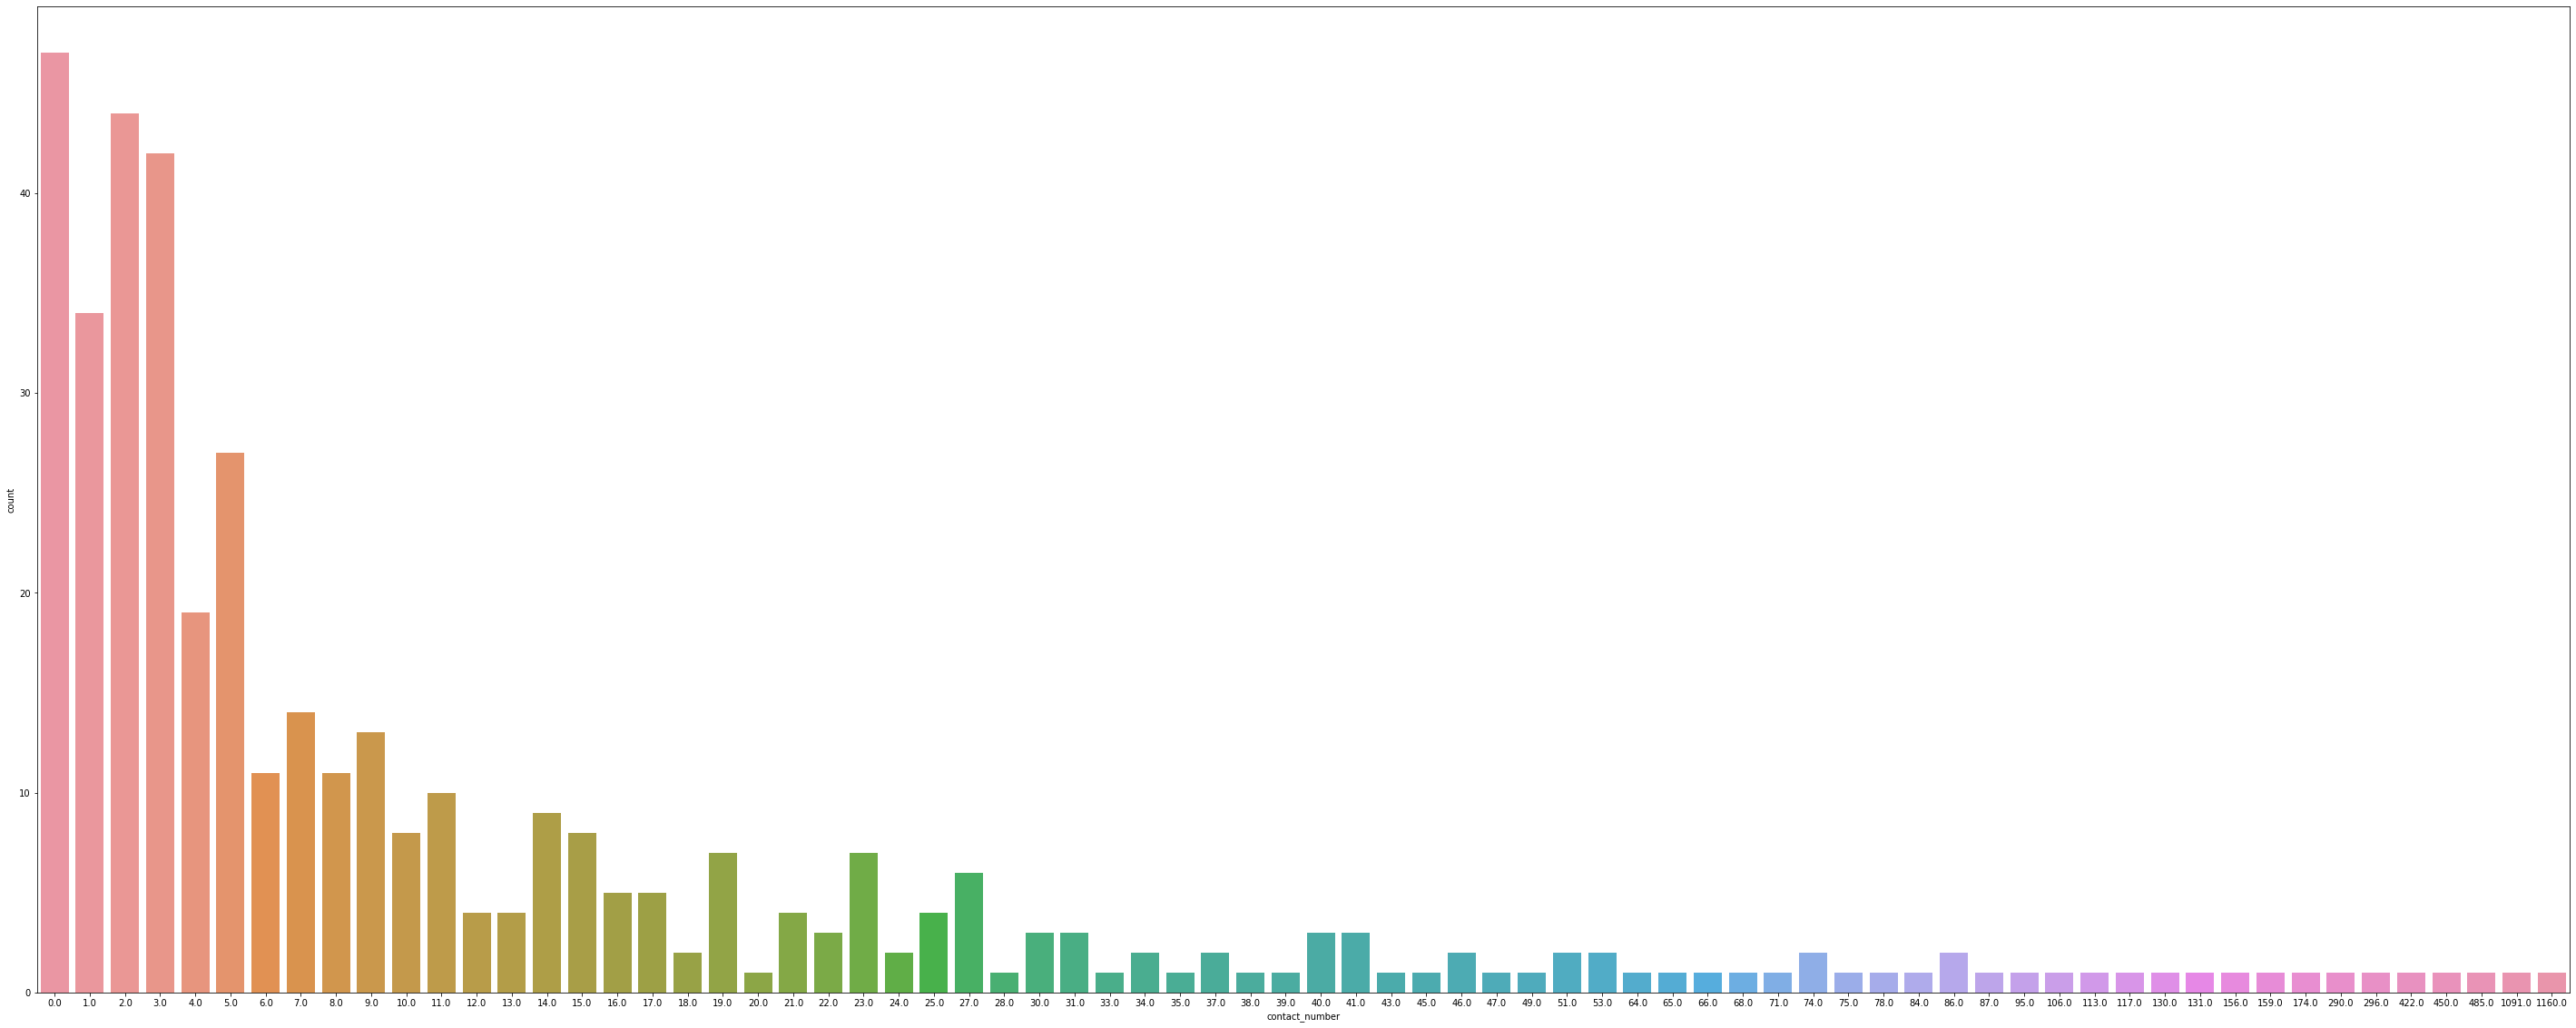

In [5]:
# PatientInfo.csv 활용
# 확진자 별 접촉자 수
figure, ax = plt.subplots()
figure.set_size_inches(50, 20)
sns.countplot(data=patient_info, x="contact_number")

##counts 10이하가 집단감염의 중심이라 보고 나중에 따로 구분해서 처리

한 사람 당 접촉자 수는 최대 1160명을 정도로 많다.

실제 이 사람은 신천지 관련 환자이고 이외에도 다수의 접촉을 한 사람으로 인해서 집단 감염이 생겼을 것으로 본다.

2. Patient_route

In [6]:
patient_route.shape

(175, 7)

In [7]:
patient_route.head()

,patient_id,global_num,date,province,city,latitude,longitude
0,1400000001,1,2020-01-19,Incheon,Jung-gu,37.460459,126.440680
1,1400000001,1,2020-01-20,Incheon,Seo-gu,37.478832,126.668558
2,1000000001,2,2020-01-22,Gyeonggi-do,Gimpo-si,37.562143,126.801884
3,1000000001,2,2020-01-23,Seoul,Jung-gu,37.567454,127.005627
4,2000000001,3,2020-01-20,Incheon,Jung-gu,37.460459,126.440680


In [8]:
patient_route.isnull().sum()

patient_id    0
global_num    0
date          0
province      0
city          0
latitude      0
longitude     0
dtype: int64

In [9]:
# PatientRoute.csv 활용
# 확진자별 이동경로
import plotly.express as px
fig = px.line_geo(patient_route, lat = 'latitude', lon = 'longitude', scope= 'asia', color = 'patient_id')
fig.show()

31번 확진자까지만 담긴 데이터 파일이다 보니 데이터가 한참 모자라다.

외부 데이터를 가져와서 시각화를 해야 확진자 전체 동선 파악이 가능하다.

3. Time.csv

In [10]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [11]:
time.isnull().sum()

date         0
time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

In [12]:
# time.csv 활용
# 일간 확진자, 사망자, 격리해제자

x_time = time['date']
y_confirm = time['confirmed']
y_release = time['released']
y_decease = time['deceased']
import plotly.offline as pyo
import plotly.graph_objs as go
trace1 = go.Bar(x = x_time, y = y_confirm, name = 'confirmed')
trace2 = go.Scatter(x = x_time, y = y_decease, mode = 'lines',name = 'deceased')
trace3 = go.Scatter(x = x_time, y = y_release, mode = 'lines+markers',name = 'released')
data = [trace1, trace2, trace3]
pyo.iplot(data)

시간이 지날수록 사망자 수에 비해 격리해제자가 많이 증가함을 확인할 수 있다. 

4. SearchTrend.csv

In [13]:
search_trend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-03-17,0.15554,0.34471,0.18181,0.01236
1,2016-03-18,0.14417,0.49416,0.17563,0.01027
2,2016-03-19,0.13290,0.39907,0.15145,0.01154
3,2016-03-20,0.13863,0.39662,0.14408,0.00945
4,2016-03-21,0.16735,0.56989,0.21199,0.00963


SearchTrend 데이터

2016.03.17 - 2020.03.16 일별 네이버 검색비율이다.

date : 날짜

cold : 감기

flu : 독감

pnuemonia : 폐렴

coronavirus : 코로나

In [14]:
search_trend.isnull().sum()

date           0
cold           0
flu            0
pneumonia      0
coronavirus    0
dtype: int64

In [0]:
# Time.csv + SearchTrend.csv
time_search = pd.merge(time,search_trend, on=['date'])

코로나 바이러스가 퍼진 시점부터 검색량 비율을 비교하기 위해 Time.csv와 SearchTrend.csv를 병합한다.

In [16]:
time_search.shape

(57, 11)

In [17]:
time_search.head()

,date,time,test,negative,confirmed,released,deceased,cold,flu,pneumonia,coronavirus
0,2020-01-20,16,1,0,1,0,0,0.19217,0.70343,3.63716,20.69610
1,2020-01-21,16,1,0,1,0,0,0.22462,0.59789,4.31987,35.33284
2,2020-01-22,16,4,3,1,0,0,0.23808,0.56661,3.66416,29.74474
3,2020-01-23,16,22,21,1,0,0,0.30308,0.55625,3.18035,100.00000
4,2020-01-24,16,27,25,2,0,0,0.34689,0.40226,2.48156,86.11541


In [18]:
# SearchTrend.csv
# 확진자와 코로나 검색량 연관성 확인
x_time = time_search['date']
y_confirm = time_search['confirmed']
y_cold = time_search['cold']*80
y_flu = time_search['flu']*80
y_pneumonia = time_search['pneumonia']*80
y_corona = time_search['coronavirus']*80
import plotly.offline as pyo
import plotly.graph_objs as go
trace1 = go.Bar(x = x_time, y = y_confirm, name = '확진')
trace2 = go.Scatter(x = x_time, y = y_cold, mode = 'lines',name = '감기')
trace3 = go.Scatter(x = x_time, y = y_flu, mode = 'lines',name = '독감')
trace4 = go.Scatter(x = x_time, y = y_pneumonia, mode = 'lines',name = '폐렴')
trace5 = go.Scatter(x = x_time, y = y_corona, mode = 'lines',name = '코로나')
data = [trace1, trace2, trace3, trace4, trace5]
pyo.iplot(data)

최초 코로나가 발생한 시점에 가장 많은 검색량이 발생했고, 확진자가 급등하기 시작한 2월 18일부터 5일간 엄청난 증가세를 보였다.

확진자의 증가 추세에 따라 사람들의 심리적 불안감이 나타났음을 의미한다.